In [ ]:
# Import Dependancies
import pprint as pp
from pathlib import Path
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np

In [ ]:
# Create file path
path = 'Cleaned_Crimes_-_2016_to_present.csv'

# Read csv file with pandas
df = pd.read_csv(path, encoding='ISO-8859-1')

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p')
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,25953,JE240540,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,...,36.0,19.0,01A,1141387.0,1913179.0,2021,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)"
1,1,26038,JE279849,06/26/2021 09:24:00 AM,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,...,50.0,13.0,01A,1152781.0,1941458.0,2021,11/18/2023 03:39:49 PM,41.995219,-87.713355,"(41.995219444, -87.713354912)"
2,2,13279676,JG507211,11/09/2023 07:30:00 AM,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,...,47.0,5.0,05,1162518.0,1925906.0,2023,11/18/2023 03:39:49 PM,41.952345,-87.677975,"(41.952345086, -87.677975059)"
3,3,13274752,JG501049,11/12/2023 07:59:00 AM,086XX S COTTAGE GROVE AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,...,6.0,44.0,08B,1183071.0,1847869.0,2023,12/09/2023 03:41:24 PM,41.737751,-87.604856,"(41.737750767, -87.604855911)"
4,4,13203321,JG415333,09/06/2023 05:00:00 PM,002XX N Wells st,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,...,42.0,32.0,14,1174694.0,1901831.0,2023,11/04/2023 03:40:18 PM,41.886018,-87.633938,"(41.886018055, -87.633937881)"


In [ ]:
df.info()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,25953,JE240540,2021-05-24 15:06:00,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,...,36.0,19.0,01A,1141387.0,1913179.0,2021,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)"
1,1,26038,JE279849,2021-06-26 09:24:00,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,...,50.0,13.0,01A,1152781.0,1941458.0,2021,11/18/2023 03:39:49 PM,41.995219,-87.713355,"(41.995219444, -87.713354912)"
2,2,13279676,JG507211,2023-11-09 07:30:00,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,...,47.0,5.0,05,1162518.0,1925906.0,2023,11/18/2023 03:39:49 PM,41.952345,-87.677975,"(41.952345086, -87.677975059)"
3,3,13274752,JG501049,2023-11-12 07:59:00,086XX S COTTAGE GROVE AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,...,6.0,44.0,08B,1183071.0,1847869.0,2023,12/09/2023 03:41:24 PM,41.737751,-87.604856,"(41.737750767, -87.604855911)"
4,4,13203321,JG415333,2023-09-06 17:00:00,002XX N Wells st,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,...,42.0,32.0,14,1174694.0,1901831.0,2023,11/04/2023 03:40:18 PM,41.886018,-87.633938,"(41.886018055, -87.633937881)"


In [ ]:
clean_df = df['Description'] = df['Description'].replace({
    'STRONGARM - NO WEAPON' : 'STRONG ARM-NO WEAPON',
    'STRONG ARM - NO WEAPON' : 'STRONG ARM-NO WEAPON',
    'ARMED: HANDGUN' : 'ARMED-HANDGUN',
    'ARMED - HANDGUN' : 'ARMED-HANDGUN',
    'ARMED:KNIFE/CUTTING INSTRUMENT' : 'ARMED-KNIFE/CUTTING INSTRUMENT',
    'ARMED - KNIFE/CUTTING INSTRUMENT' : 'ARMED-KNIFE/CUTTING INSTRUMENT',
    'ARMED: OTHER DANGEROUS WEAPON' : 'ARMED-OTHER DANGEROUS WEAPON',
    'ARMED - OTHER DANGEROUS WEAPON' : 'ARMED-OTHER DANGEROUS WEAPON',
    'ATTEMPT: STRONGARM-NO WEAPON' : 'ATTEMPT-STRONGARM-NO WEAPON',
    'ATTEMPT - STRONGARM-NO WEAPON' : 'ATTEMPT-STRONGARM-NO WEAPON',
    'ATTEMPT: ARMED-HANDGUN' : 'ATTEMPT-ARMED-HANDGUN',
    'ATTEMPT - ARMED-HANDGUN' : 'ATTEMPT-ARMED-HANDGUN',
    'ATTEMPT: ARMED-KNIFE/CUT INSTR' : 'ATTEMPT-ARMED-KNIFE/CUT INSTRUMENT',
    'ATTEMPT - ARMED-KNIFE/CUT INSTR' : 'ATTEMPT-ARMED-KNIFE/CUT INSTRUMENT',
    'ATTEMPT: AGGRAVATED' : 'ATTEMPT-AGGRAVATED',
    'ATTEMPT - AGGRAVATED' : 'ATTEMPT-AGGRAVATED',
    'ATTEMPT: ARMED-OTHER DANG WEAP' : 'ATTEMPT-ARMED-OTHER',
    'ATTEMPT - ARMED-OTHER DANG WEAP' : 'ATTEMPT-ARMED-OTHER',
    'ARMED: OTHER FIREARM' : 'ARMED-OTHER FIREARM',
    'ARMED - OTHER FIREARM' : 'ARMED-OTHER FIREARM',
    'ATTEMPT: ARMED-OTHER FIREARM' : 'ATTEMPT-ARMED-OTHER FIREARM',
    'ATTEMPT - ARMED-OTHER FIREARM' : 'ATTEMPT-ARMED-OTHER FIREARM',
    'STRONGARM: NO WEAPON' : 'STRONGARM-NO WEAPON',
    'STRONGARM - NO WEAPON' : 'STRONGARM-NO WEAPON',
    'ATTEMPT ARMED: HANDGUN' : 'ATTEMPT ARMED-HANDGUN',
    'ATTEMPT ARMED - HANDGUN' : 'ATTEMPT ARMED-HANDGUN',
    'ATTEMPT STRONG ARM: NO WEAPON' : 'ATTEMPT STRONG ARM-NO WEAPON',
    'ATTEMPT STRONG ARM - NO WEAPON' : 'ATTEMPT STRONG ARM-NO WEAPON'
})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2171288 entries, 0 to 2171287
Data columns (total 24 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Unnamed: 0            int64         
 1   ID                    int64         
 2   Case Number           object        
 3   Date                  datetime64[ns]
 4   Block                 object        
 5   IUCR                  object        
 6   Primary Type          object        
 7   Description           object        
 8   Location Description  object        
 9   Arrest                bool          
 10  Domestic              bool          
 11  Beat                  int64         
 12  District              float64       
 13  Ward                  float64       
 14  Community Area        float64       
 15  FBI Code              object        
 16  X Coordinate          float64       
 17  Y Coordinate          float64       
 18  Year                  int64         
 19  

In [ ]:
# Get the total number of rows
total_rows = len(df)
print(total_rows)

In [ ]:
# Calculate the percentage of missing values for each column
missing_percentage = (df['Longitude'].isnull().sum() / len(df)) * 100
print(missing_percentage)

In [ ]:
district_count = len(df['District'].unique())
district_count

In [ ]:
iucr_count = len(df['IUCR'].unique())
iucr_count

In [ ]:
# Drop rows where 'column_name' has a missing value
dropped_rows = df.dropna(subset=['Location'])
more_dropped = dropped_rows.dropna(subset=['Ward','Community Area','District'])

dropped_rows_missing_count = dropped_rows.isnull().sum()
print(dropped_rows_missing_count)

In [ ]:
more_dropped_rows_missing_count = more_dropped.isnull().sum()
print(more_dropped_rows_missing_count)

In [ ]:
# Replace NaN values in 'Location Description' and save in a new DataFrame
cleaned_crime_data = more_dropped.copy()  # Create a copy of the original DataFrame
cleaned_crime_data['Location Description'] = cleaned_crime_data['Location Description'].fillna('Unknown')

# Display the first few rows of the cleaned DataFrame
cleaned_crime_data.head()

In [ ]:
cleaned_crime_count = cleaned_crime_data.groupby('Primary Type').size()
cleaned_crime_count.sort_values(ascending=False)

Primary Type
THEFT                                489381
BATTERY                              402701
CRIMINAL DAMAGE                      243963
ASSAULT                              179954
DECEPTIVE PRACTICE                   148930
OTHER OFFENSE                        137443
MOTOR VEHICLE THEFT                  130405
BURGLARY                              85359
ROBBERY                               84639
NARCOTICS                             77808
WEAPONS VIOLATION                     61349
CRIMINAL TRESPASS                     47136
OFFENSE INVOLVING CHILDREN            17490
PUBLIC PEACE VIOLATION                10233
SEX OFFENSE                            9693
CRIMINAL SEXUAL ASSAULT                7994
INTERFERENCE WITH PUBLIC OFFICER       7366
HOMICIDE                               6028
CRIM SEXUAL ASSAULT                    5098
ARSON                                  4150
PROSTITUTION                           4028
STALKING                               2682
LIQUOR LAW VIOLATIO

In [90]:
df.columns.to_list()

['Unnamed: 0',
 'ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

In [91]:
filtered_df = df[df['Primary Type'].isin(['THEFT', 'BURGLARY', 'ROBBERY'])]
filtered_df.head()


,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
2,2,13279676,JG507211,2023-11-09 07:30:00,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,...,47.0,5.0,05,1162518.0,1925906.0,2023,11/18/2023 03:39:49 PM,41.952345,-87.677975,"(41.952345086, -87.677975059)"
17,17,13210062,JG423596,2023-08-27 07:00:00,034XX N LAWNDALE AVE,0820,THEFT,$500 AND UNDER,APARTMENT,False,...,30.0,21.0,06,1151117.0,1922554.0,2023,09/16/2023 03:41:56 PM,41.943379,-87.719974,"(41.943378528, -87.7199738)"
19,19,13210060,JG423567,2023-08-15 14:20:00,077XX S SPAULDING AVE,0810,THEFT,OVER $500,RESIDENCE - PORCH / HALLWAY,False,...,18.0,70.0,06,1155724.0,1853097.0,2023,09/16/2023 03:41:56 PM,41.752689,-87.704909,"(41.752688801, -87.704908791)"
21,21,13210071,JG421086,2023-09-03 10:27:00,089XX S LOOMIS ST,0890,THEFT,FROM BUILDING,APARTMENT,False,...,21.0,73.0,06,1168564.0,1845472.0,2023,09/16/2023 03:41:56 PM,41.731498,-87.658075,"(41.731497731, -87.658074565)"
22,22,13210035,JG422370,2023-08-17 07:00:00,019XX W 71ST ST,0820,THEFT,$500 AND UNDER,STREET,False,...,17.0,67.0,06,1164749.0,1857588.0,2023,09/16/2023 03:41:56 PM,41.764827,-87.671709,"(41.764827083, -87.671709119)"


In [92]:
unique_description = filtered_df['Description'].unique().tolist()
pp.pprint(unique_description)

['UNLAWFUL ENTRY',
 '$500 AND UNDER',
 'OVER $500',
 'FROM BUILDING',
 'ARMED-HANDGUN',
 'VEHICULAR HIJACKING',
 'RETAIL THEFT',
 'ARMED-OTHER FIREARM',
 'AGGRAVATED VEHICULAR HIJACKING',
 'ATTEMPT FORCIBLE ENTRY',
 'FORCIBLE ENTRY',
 'THEFT FROM MOTOR VEHICLE',
 'STRONG ARM-NO WEAPON',
 'AGGRAVATED',
 'ARMED-OTHER DANGEROUS WEAPON',
 'ATTEMPT ARMED-HANDGUN',
 'POCKET-PICKING',
 'ATTEMPT AGGRAVATED',
 'HOME INVASION',
 'ARMED - KNIFE / CUTTING INSTRUMENT',
 'BURGLARY FROM MOTOR VEHICLE',
 'ATTEMPT STRONG ARM-NO WEAPON',
 'ATTEMPT THEFT',
 'ATTEMPT ARMED - KNIFE / CUTTING INSTRUMENT',
 'PURSE-SNATCHING',
 'ATTEMPT ARMED - OTHER DANGEROUS WEAPON',
 'FROM COIN-OPERATED MACHINE OR DEVICE',
 'DELIVERY CONTAINER THEFT',
 'ATTEMPT ARMED - OTHER FIREARM',
 'STRONGARM-NO WEAPON',
 'ATTEMPT-ARMED-HANDGUN',
 'ATTEMPT-STRONGARM-NO WEAPON',
 'ATTEMPT-ARMED-OTHER',
 'ATTEMPT-ARMED-KNIFE/CUT INSTRUMENT',
 'ARMED-KNIFE/CUTTING INSTRUMENT',
 'ATTEMPT-AGGRAVATED',
 'ATTEMPT-ARMED-OTHER FIREARM',
 'THEFT

In [ ]:
theft_over_50k = filtered_df.groupby('Description').filter(lambda x: len(x) >= 5000)
list_50 = theft_over_50k['Description'].unique().tolist()
pp.pprint(list_50)

['UNLAWFUL ENTRY',
 '$500 AND UNDER',
 'OVER $500',
 'FROM BUILDING',
 'ARMED-HANDGUN',
 'RETAIL THEFT',
 'AGGRAVATED VEHICULAR HIJACKING',
 'FORCIBLE ENTRY',
 'STRONG ARM-NO WEAPON',
 'POCKET-PICKING',
 'STRONGARM-NO WEAPON']


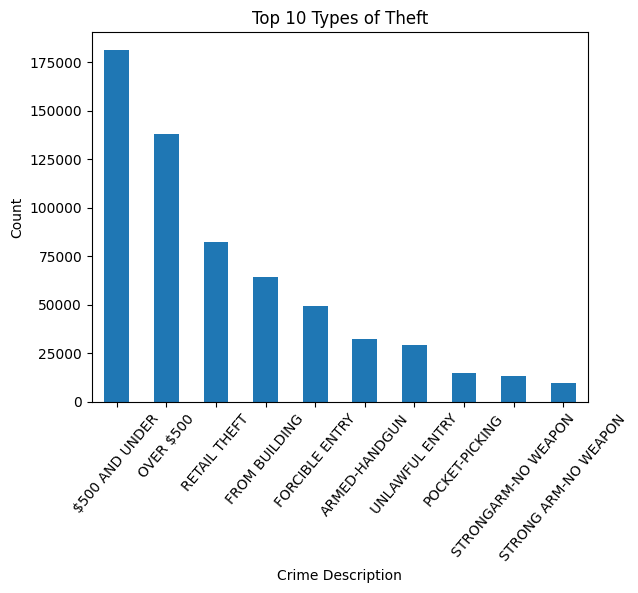

In [ ]:
top_10_theft = theft_over_50k['Description'].value_counts().head(10)
top_10_theft.plot(kind='bar')
plt.xticks(rotation=50)
plt.title("Top 10 Types of Theft")
plt.xlabel("Crime Description")
plt.ylabel("Count")
plt.show()

In [ ]:
crime_theft = filtered_df.groupby('Description').size() 
crime_theft.sort_values(ascending=False)

Description
$500 AND UNDER                                181292
OVER $500                                     137895
RETAIL THEFT                                   82377
FROM BUILDING                                  64395
FORCIBLE ENTRY                                 49404
ARMED-HANDGUN                                  32603
UNLAWFUL ENTRY                                 29309
POCKET-PICKING                                 14828
STRONGARM-NO WEAPON                            13181
STRONG ARM-NO WEAPON                            9685
AGGRAVATED VEHICULAR HIJACKING                  6955
AGGRAVATED                                      4563
ATTEMPT FORCIBLE ENTRY                          3992
PURSE-SNATCHING                                 3805
ATTEMPT THEFT                                   3236
VEHICULAR HIJACKING                             3000
ARMED-OTHER DANGEROUS WEAPON                    2996
HOME INVASION                                   2318
ARMED-KNIFE/CUTTING INSTRUMENT    

In [ ]:
crime_all = df.groupby('Primary Type').size() 
crime_all.sort_values(ascending=False)

In [ ]:
# Define pandemic periods
df['Pandemic Period'] = pd.cut(
    df['Date'],
    bins=[
        pd.Timestamp('2017-01-01'),
        pd.Timestamp('2020-01-31'),
        pd.Timestamp('2023-05-11'),
        pd.Timestamp(datetime.now())
    ],
    labels=['Before Pandemic', 'During Pandemic', 'After Pandemic']
)

# Basic stats and summary by period
print(df.info())
print(df.groupby('Pandemic Period').size())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2171288 entries, 0 to 2171287
Data columns (total 24 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Unnamed: 0            int64         
 1   ID                    int64         
 2   Case Number           object        
 3   Date                  datetime64[ns]
 4   Block                 object        
 5   IUCR                  object        
 6   Primary Type          object        
 7   Description           object        
 8   Location Description  object        
 9   Arrest                bool          
 10  Domestic              bool          
 11  Beat                  int64         
 12  District              float64       
 13  Ward                  float64       
 14  Community Area        float64       
 15  FBI Code              object        
 16  X Coordinate          float64       
 17  Y Coordinate          float64       
 18  Year                  int64         
 19  

C:\Users\Ian O'Connor\AppData\Local\Temp\ipykernel_74440\192109582.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Pandemic Period').size())


In [97]:
# Sort the DataFrame by 'X Coordinate' and 'Y Coordinate' in ascending order
sorted_coordinates = df[['X Coordinate', 'Y Coordinate']].sort_values(by=['X Coordinate', 'Y Coordinate'], ascending=False)

# Display the sorted values
print(sorted_coordinates)

         X Coordinate  Y Coordinate
748963      1205119.0     1834458.0
30933       1205119.0     1834444.0
723572      1205119.0     1834444.0
752693      1205119.0     1834424.0
1686951     1205119.0     1834424.0
...               ...           ...
1978930     1091242.0     1941464.0
1156751           0.0           0.0
1323644           0.0           0.0
2012538           0.0           0.0
2022008           0.0           0.0

[2171288 rows x 2 columns]


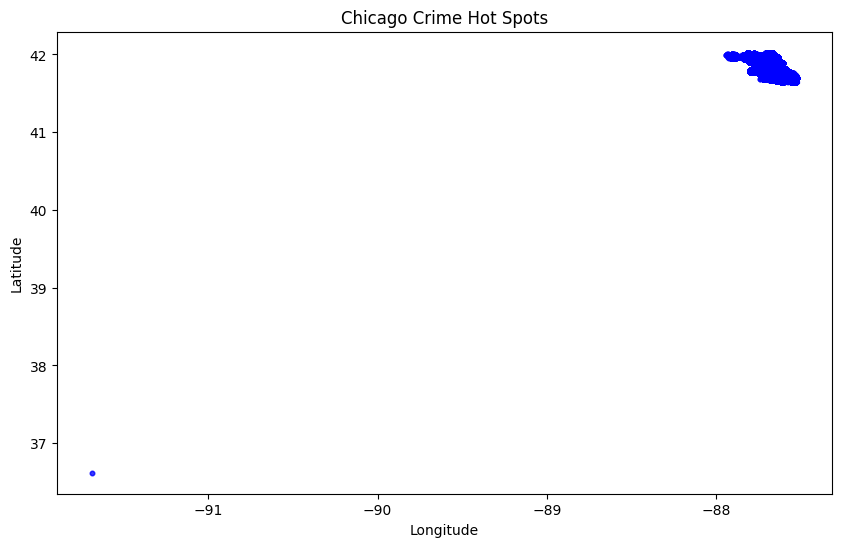

In [ ]:
# Filter data for relevant columns
crime_location_data = df[['Date', 'Primary Type', 'Latitude', 'Longitude', 'Pandemic Period']].dropna()
crime_location_data = crime_location_data[(crime_location_data['Latitude'] != 0.0) & (crime_location_data['Longitude'] != 0.0) & (crime_location_data['Latitude'] > 37.0)]

# Plotting hot spots using Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(crime_location_data['Longitude'], crime_location_data['Latitude'], alpha=0.3, c='blue', s=10)
plt.title("Chicago Crime Hot Spots")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

C:\Users\Ian O'Connor\AppData\Local\Temp\ipykernel_74440\2564466888.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  period_crime_counts = df.groupby('Pandemic Period').size()


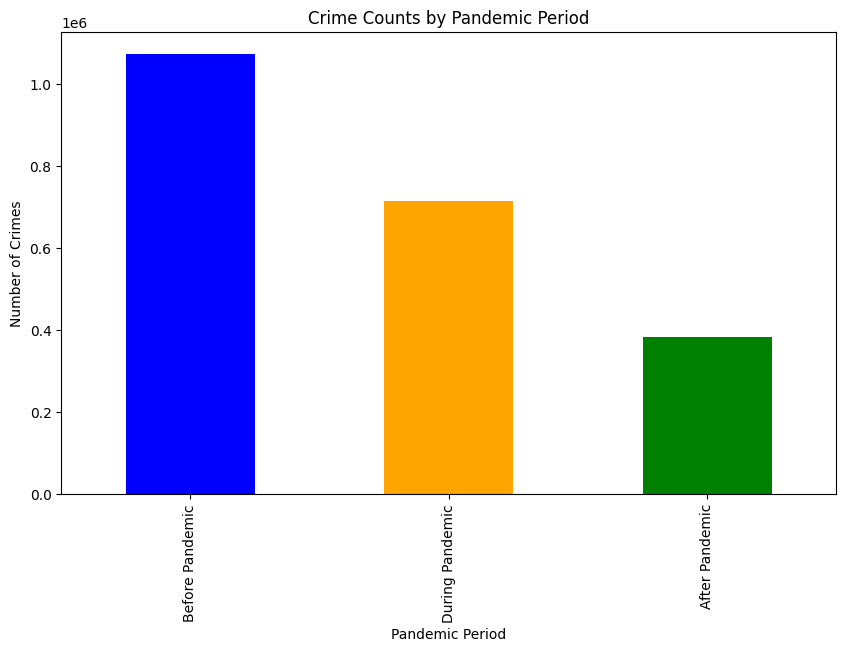

In [99]:
# Grouping crime data by Pandemic Period for trend analysis
period_crime_counts = df.groupby('Pandemic Period').size()

# Bar plot to visualize crime counts by pandemic period
period_crime_counts.plot(kind='bar', color=['blue', 'orange', 'green'], figsize=(10, 6))
plt.title("Crime Counts by Pandemic Period")
plt.xlabel("Pandemic Period")
plt.ylabel("Number of Crimes")
plt.show()

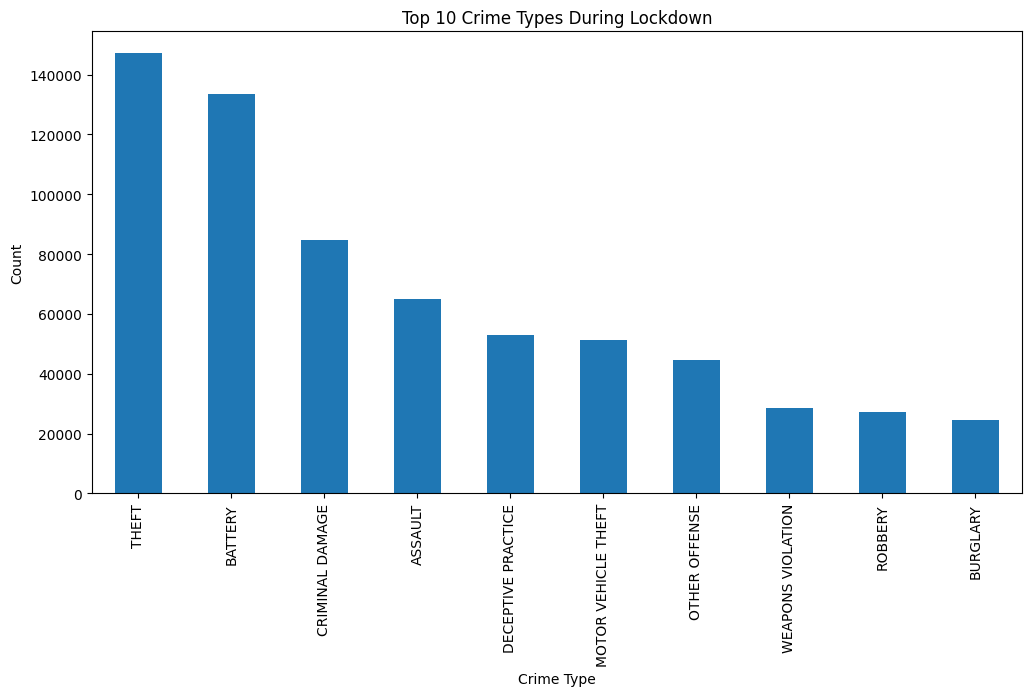

In [102]:
# Filter data for the lockdown period (approx. Feb 2020 - Jan 2021)
lockdown_data = df[(df['Date'] >= '2020-01-31') & (df['Date'] < '2023-05-11')]

# Analyze and plot crime types during lockdown
lockdown_crime_counts = lockdown_data['Primary Type'].value_counts().head(10)
lockdown_crime_counts.plot(kind='bar', figsize=(12, 6))
plt.title("Top 10 Crime Types During Lockdown")
plt.xlabel("Crime Type")
plt.ylabel("Count")
plt.show()